# `PATIENT CHURN PREDICTION`

The purpose of this project is to build predictive models that predict if patients leave or stay with a certain healthcare provider.

This predictions will help the provider better understand their patients in terms of their likelihood to leave of stay. In turn, they will employ targeted retention strategies for all clients flagged by the models as likely to churn

# `ABOUT THE DATASET USED`

This Patient Churn dataset represents synthetic healthcare data of 500 patients designed for churn prediction and machine learning analysis. Each record contains demographic details like Age and Gender, along with service-related features such as Tenure in months, number of hospital Visits in the last year, presence of Chronic Disease, and type of Insurance. It also includes behavioral and financial indicators like Satisfaction Score, Total Bill Amount, and number of Missed Appointments. The target column, Churn, indicates whether a patient has stopped using the hospital’s services (1 = churned, 0 = active). Overall, this dataset is suitable for studying patient retention patterns and building predictive models to identify patients at risk of leaving a healthcare provider.

In [94]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = "Georgia" 
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'black'

In [95]:
# Load datset
df = pd.read_csv(r"Data\patient_churn_dataset.csv")

df.head()

,Patient_ID,Age,Gender,Tenure_Months,Visits_Last_Year,Chronic_Disease,Insurance_Type,Satisfaction_Score,Total_Bill_Amount,Missed_Appointments,Churn
0,1,56,Female,2,3,No,Government,2.5,12252.96,9,1
1,2,69,Male,10,3,Yes,Government,2.6,25862.01,4,0
2,3,46,Female,56,10,No,NaN,2.8,5659.13,4,0
3,4,32,Male,30,4,Yes,Government,4.1,19533.31,5,0
4,5,60,Male,50,19,No,Private,4.6,24639.52,5,0


In [96]:
# Check dataset info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    str    
 3   Tenure_Months        500 non-null    int64  
 4   Visits_Last_Year     500 non-null    int64  
 5   Chronic_Disease      500 non-null    str    
 6   Insurance_Type       350 non-null    str    
 7   Satisfaction_Score   500 non-null    float64
 8   Total_Bill_Amount    500 non-null    float64
 9   Missed_Appointments  500 non-null    int64  
 10  Churn                500 non-null    int64  
dtypes: float64(2), int64(6), str(3)
memory usage: 43.1 KB


In [97]:
# Check for duplicated entries
print(f"There are {df.duplicated().sum()} values in the dataset")

There are 0 values in the dataset


In [98]:
# Check for null values
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Tenure_Months            0
Visits_Last_Year         0
Chronic_Disease          0
Insurance_Type         150
Satisfaction_Score       0
Total_Bill_Amount        0
Missed_Appointments      0
Churn                    0
dtype: int64

## Notes

- The INSURANCE_TYPE Column has 150 missing values

In [99]:
# Since Insurance_Type column has some missing values we will explore it further
df["Insurance_Type"].unique()

<StringArray>
['Government', nan, 'Private']
Length: 3, dtype: str

## Notes

- The column has 2 variables - This will inform our null handling later during modelling

In [100]:
# Get characteristics of numerical columns
df.drop("Patient_ID", axis=1).describe()

,Age,Tenure_Months,Visits_Last_Year,Satisfaction_Score,Total_Bill_Amount,Missed_Appointments,Churn
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,49.910000,29.498000,9.412000,3.049000,24440.01518,4.422000,0.248000
std,18.221909,17.402865,5.687086,1.148136,14264.55432,2.908752,0.432284
min,18.000000,1.000000,0.000000,1.000000,506.67000,0.000000,0.000000
25%,35.000000,14.000000,4.000000,2.000000,13576.08750,2.000000,0.000000
50%,50.000000,30.000000,9.000000,3.100000,23996.56000,4.000000,0.000000
75%,66.000000,45.000000,14.000000,4.100000,36289.66000,7.000000,0.000000
max,79.000000,59.000000,19.000000,5.000000,49892.13000,9.000000,1.000000


In [101]:
# Get characteristics of categorical columns
df.describe(include="O")

,Gender,Chronic_Disease,Insurance_Type
count,500,500,350
unique,2,2,2
top,Female,No,Government
freq,250,260,180


# `EXPLORATORY DATA ANALYSIS`

## EDA - Categorical Columns

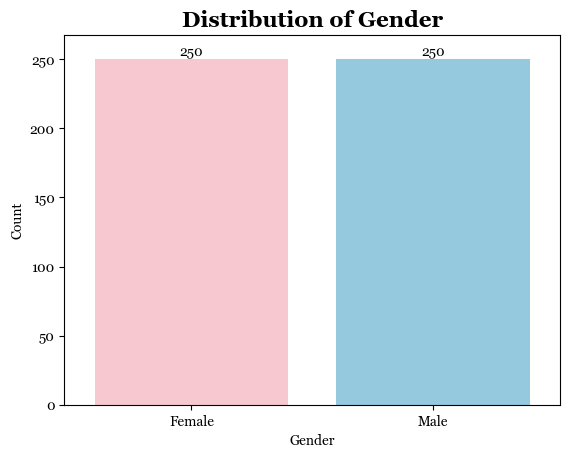

In [102]:
# Distribution of Gender
gender_count = df["Gender"].value_counts().reset_index(name="Count")

# Horizontal bar graph to show Gender distribution
ax = sns.barplot(data=gender_count, y="Count", x="Gender", palette=["Pink", "Skyblue"])

# Add labels
for i in ax.containers:
    ax.bar_label(i, fmt="%d")

ax.margins(0.07)
ax.set_title("Distribution of Gender", )
plt.show()


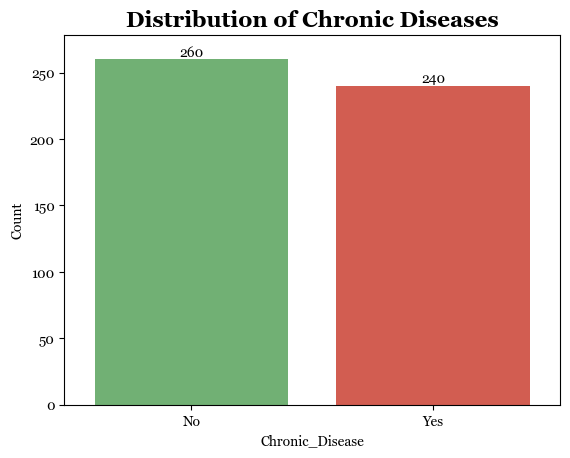

In [103]:
# Distribution of Chronic Disease
chronic_disease_dist = df["Chronic_Disease"].value_counts().reset_index(name="Count")

# Plot barplot to visually show distribtion
ax = sns.barplot(data=chronic_disease_dist, y="Count", x="Chronic_Disease", palette=["#66bb6a", "#e74c3c"])

for i in ax.containers:
    ax.bar_label(i)

ax.margins(0.07)
ax.set_title("Distribution of Chronic Diseases")
plt.show()

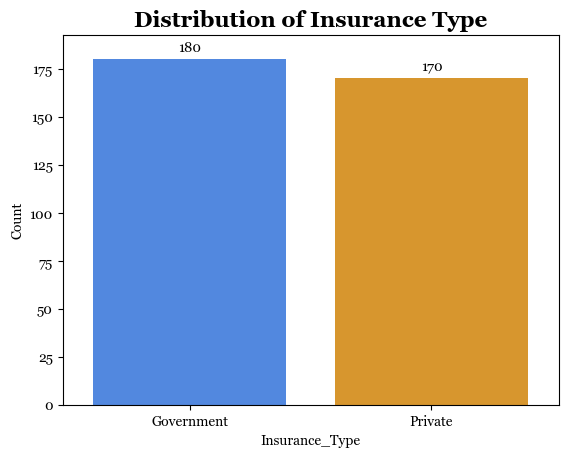

In [106]:
# Insurance Type distribution
insurance_dist = df["Insurance_Type"].value_counts().reset_index(name="Count")

# Plot barplot and assign to ax
ax = sns.barplot(
    data=insurance_dist,
    x="Insurance_Type",
    y="Count",
    palette=["#3b82f6", "#f39c12"]
)

# Add labels
for container in ax.containers:
    ax.bar_label(container, padding=3)

ax.margins(0.07)
ax.set_title("Distribution of Insurance Type")

plt.show()

## Notes
- Gender is perfectly equally distributed

- For Insurance Type and Chronic Disease, they are not perfectly distributed. However the variance is only a small margin of 10 counts each